# 2019년 12월 10일 

In [1]:
# 남이 만든 모델 (학습된 모델)
from tensorflow.keras.applications import VGG16

Xception
VGG16
VGG19
ResNet, ResNetV2
InceptionV3
InceptionResNetV2
MobileNet
MobileNetV2
DenseNet
NASNet

In [4]:
vgg = VGG16(include_top=False, weights ='imagenet')

In [5]:
vgg.summary()
# fully connected layer
# included_top=False: fully connected layer(Dense)가 안 쌓인다. 

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

특정 레이어를 뽑아낼 수 있다.
각 레이어마다 바이어스와 필터들이 있다. 

get_layer해서 뽑애낼 수 있고, get_weights()를 가져올 수 있다.

In [9]:
block1_conv1 = vgg.get_layer('block1_conv1')

In [11]:
len(block1_conv1.get_weights())

2

### Filter visualization

In [48]:
filters, bias = block1_conv1.get_weights()

NameError: name 'block1_conv1' is not defined

In [14]:
filters.shape

(3, 3, 3, 64)

In [15]:
bias.shape

(64,)

In [18]:
filters[...,0].shape

(3, 3, 3)

In [19]:
import matplotlib.pyplot as plt

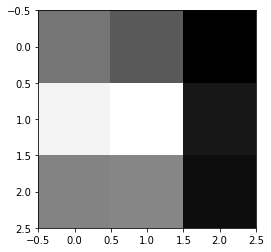

In [30]:
plt.imshow(filters[:,:,0,63], cmap='gray')

In [22]:
def normalize(x):
    return (x-x.min())/(x.max() -x.min())

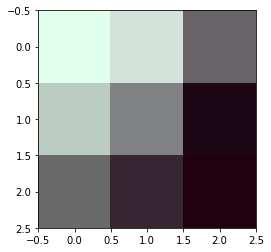

In [28]:
plt.imshow(normalize(filters[:,:,:,0]), cmap='gray')

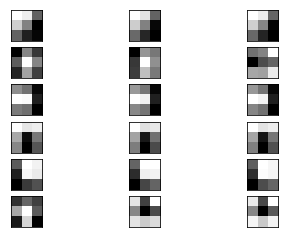

In [33]:
n_filters, ix = 6, 1
for i in range(n_filters):
	# Get the filter
	f = filters[:, :, :, i]
	# Plot each channel separately
	for j in range(3):
		# Specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# Plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1

In [34]:
block1_conv1.output

<tf.Tensor 'block1_conv1_2/Identity:0' shape=(None, None, None, 64) dtype=float32>

In [35]:
block1_conv1.input

<tf.Tensor 'input_3:0' shape=(None, None, None, 3) dtype=float32>

In [2]:
# 남이 만든 모델 (학습된 모델)
from tensorflow.keras.applications import VGG16

In [46]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from tensorflow.keras.models import Model 

In [47]:
vgg = VGG16()
model = Model(inputs=vgg.inputs, 
              outputs=vgg.layers[2].output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


In [7]:
import PIL

In [8]:
bono = PIL.Image.open('bono.jpg')

In [9]:
bono = bono.resize((224,224))

In [10]:
img = img_to_array(bono)
# np.array(bono)

In [11]:
img = np.expand_dims(img,axis=0)
# [np.newaxis]

In [12]:
img=preprocess_input(img)

In [13]:
# img = np.resize(img, (1, 224,224,3))

In [14]:
feature_maps = model.predict(img)

In [15]:
feature_maps[0,0,0,:4]

array([710.9261  ,  50.936253, 112.60277 , 104.94722 ], dtype=float32)

In [16]:
feature_maps.shape

(1, 224, 224, 64)

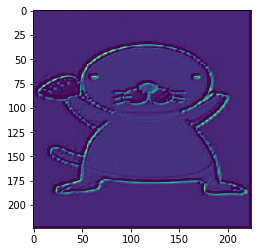

In [20]:
plt.imshow(feature_maps[0,...,1])

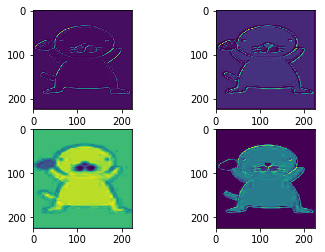

In [40]:
fig, axes=plt.subplots(2,2)
for i,axs in enumerate(axes.ravel()):
    axs.imshow(feature_maps[0,...,i])

In [ ]:
square = 8
ix = 1
for _in range(square):
    for _ in range(square):
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps)

In [32]:
# CNN은 컴볼루션을 학습하는 애 

### Tensorflow hub - Transfer learning

In [1]:
import tensorflow as tf

In [2]:
import tensorflow_hub as hub
from tensorflow.keras import layers

In [3]:
!pip install -U tensorflow-hub

Requirement already up-to-date: tensorflow-hub in c:\users\cho gyung ah\anaconda3\lib\site-packages (0.7.0)


AUTOTUNE (experimental 애들은 버전이 더 자주 바뀐다.)

In [4]:
!pip show tensorflow-hub

Name: tensorflow-hub
Version: 0.7.0
Summary: TensorFlow Hub is a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.
Home-page: https://github.com/tensorflow/hub
Author: Google LLC
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\cho gyung ah\anaconda3\lib\site-packages
Requires: six, protobuf, numpy
Required-by: 


### An ImageNet Classifier

In [7]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

---

In [8]:
a=[]
a.append(3)
a.extend([4])

In [9]:
a

[3, 4]

In [10]:
# list, tuple 더하기는 extend
a+[4]

[3, 4, 4]

---

In [11]:
IMAGE_SHAPE = (224, 224)


# dense를 집어넣을때 input_dim=3를 넣을 수 있지만, 안쓴는 것을 추천
# classifier_url을 집어넣을 때는 input_dim이 안되기 때문이다. 
# keras에서 첫번째 layer는 input shape를 넣어줘야한다. 
classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

In [12]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


In [13]:
# layer를 뽑는 3가지
# .layers/.inputs/.outputs

In [14]:
classifier.layers

- 이름으로 접근  
- 숫자로 이용 

인덱스 슬라이싱 다된다. 

In [15]:
classifier.inputs

[<tf.Tensor 'keras_layer_input:0' shape=(None, 224, 224, 3) dtype=float32>]

In [16]:
# flatten이 되어있다. 
classifier.outputs

[<tf.Tensor 'keras_layer/Identity:0' shape=(None, 1001) dtype=float32>]

In [17]:
from tensorflow.keras.preprocessing.image import load_img

In [18]:
import numpy as np
import PIL.Image as Image

In [19]:
# PIL이 메모리를 더 많이 먹는다. 하지만 전처리 pil이용해서 사용할려고 pil.open한 것
# 사실은 이미지만 불러온다면 load_img를 쓰는게 더 낫다.

grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
# grace_hopper = load_img(grace_hopper).resize(IMAGE_SHAPE)

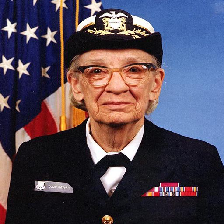

In [20]:
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper

In [21]:
# MinMax 해도 이미지의 정도로 표현하기 때문에 이미지가 나온다.
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

# tensorhub에 있는 것 

(224, 224, 3)

In [22]:
# classifier.outputs.shape
result = classifier.predict(grace_hopper[np.newaxis, ...])
type(result)
result.shape

(1, 1001)

In [23]:
dir(result)[:5]
# np.array
# 케라스의 기본은 넘파이다. 

['T', '__abs__', '__add__', '__and__', '__array__']

In [27]:
# np.argmax()

In [28]:
# argmax: 리스트 안에서 가장 큰 값의 인텍스 가져오는 것 
# argsort: prediction 두번째로 큰 것 
predicted_class = np.argsort(result[0], axis=-1)[-2]
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

# result[0], axis=-1 안넣어도 차이가 없다. 
# 653번째가 가장 값이 크다는 것이다. 

653

In [29]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [30]:
imagenet_labels[653]

'military uniform'

In [31]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

NameError: name 'plt' is not defined

### Simple transfer learning  

In [32]:
# 꽃은 예측 못한다.
# 구조 1001개인데, 아웃풋 레이어가 1001보다 많아야한다.
# 따라서 뜯어고쳐야한다. 
# 가장 기초는 풀리커넥티드 

In [33]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" 

In [34]:
data_root = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

In [35]:
# rescale//crop/resize
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
# flow_from_directory/dataframe
# target_size= default:256
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SHAPE)

Found 3670 images belonging to 5 classes.


In [36]:
'__next__' in dir(image_data)
# __next: generator, for 다 쓸 수 있다. 

True

In [37]:
for image_batch, label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


flow_from_directory

fit_generator

In [38]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [64]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names.shape

(32,)

In [43]:
import matplotlib.pyplot as plt

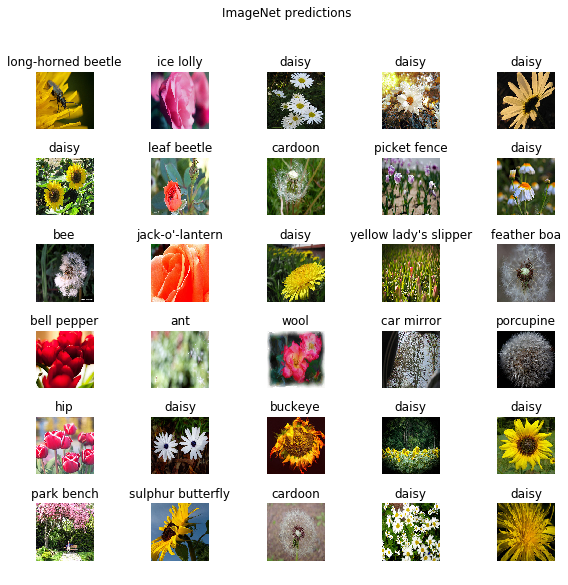

In [44]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

- Download the headless model

In [45]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}

In [46]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3))

In [47]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 1280)


In [48]:
'trainable' in dir(feature_extractor_layer)

True

In [49]:
# Fit 시켰을 때 학습이 안된다.
# 모든 레이어 상속받는 애들은 trainable이 있다. 
# 나중에 gan할 때 이 테크닉 잘 쓴다.
# 한쪽은 트레인 시키고, 한쪽은 트레인 안시키고 이런것들
feature_extractor_layer.trainable = False

- Attach a classification head

피쳐 관련된 애들 학습안시킨다. 

trainable false 를 했기 때문에 굳이 학습을 안해도된다.

In [50]:
# 예측하는 놈인데, 예측하는 머리를 뺐으므로, headless이다.

In [51]:
model = tf.keras.Sequential([
  feature_extractor_layer,
  layers.Dense(image_data.num_classes, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [52]:
predictions = model(image_batch)

In [53]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [60]:
# 통계값 낸것 
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

# 배치 당 히스토리를 만들었다. 
  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
    self.model.reset_metrics()

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [62]:
# 에폭당 스텝별 
steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)

batch_stats_callback = CollectBatchStats()

history = model.fit_generator(image_data, epochs=2,
                              steps_per_epoch=steps_per_epoch,
                             callbacks = [batch_stats_callback])

Epoch 1/2
 16/115 [===>..........................] - ETA: 16:59 - loss: 0.6364 - acc: 0.7188

KeyboardInterrupt: 

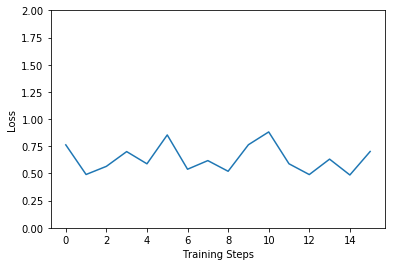

In [63]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats_callback.batch_losses)

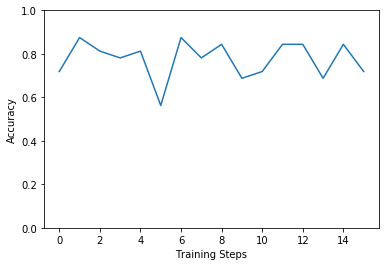

In [67]:
plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats_callback.batch_acc)

In [68]:
class_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

In [69]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [70]:
label_id = np.argmax(label_batch, axis=-1)

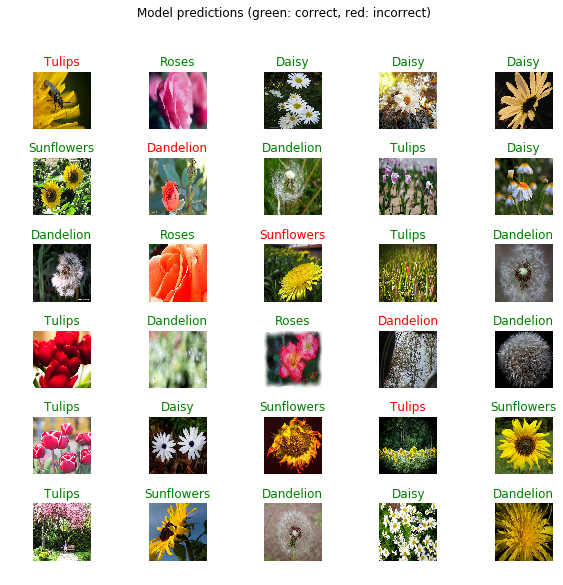

In [71]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

### tensorflow_hub  vs  keras.applications

- **tensorflow_hub: (장점/단점)**
    - 내부 구조를 알 수 없다. (자기가 만든 모델 비법을 노출하지 않을 수 있다. / 마음대로 튜닝할 수 없다.)
    - 누구나 공유할 수 있다. (자기가 만든 모델{기술력} 홍보할 수 있다. / 너무 많아서 뭘 쓸지 골라야한다.)
    - 고수가 활용하거나, 회사 차원에서 기술력 과시용으로 활용 가능하다.
    
- **keras.applications: (장점/단점)**
    - 레이어 단위까지 내부 구조를 뽑아서 쓸 수 있다. (필요한 layer만 뽑는 등 활용성 높다. / 모델 구조 노출되므로 보안 문제가 있다.) 
    - 유명한 모델 몇가지만 있다. (성능 입증된 모델만 있으므로 믿을만하다. / 다양성이 부족하다. 10 정도밖에 없음)
    - 초보자가 이용하기 좋다.

### 정리

- mobilenet

VGG 와 같은 모델 
transfer learning과 상관이없다.
모델 그대로 가져와서 사용하는 것 (classification 안에 있는애_

- featrue 

해드 (Dense) 예측하는 애, 
feature는 예측하는 애가 아니고, 예측 하는 걸 제외하고 feature extraction. 
dense layers를 내맘대로 가져올 수 있다.

- 꽃 5종류 

CNN 부분(학습하나도 안하고) fully connected 로만 꽃 5종류 분류하는 거 했다. 

기존에 잘 학습된 애는 그 능력을 다른 곳에서 활용할 수 있다. 이 것이 transfer 된것.  

데이터가 작으면 기존에 유사한 데이터 모델이 있으면 가져올 수 있다. 

학습이 잘 되려면 몇가지 특징이 있다.
- 타겟 데이타 사이즈
- 유사성 (오리지널 데이터, 타겟 데이터)


feature extraction 
- Dense만 바꾸는 것 

fine-tuning 
- 레이어 추가 & 뽑아 쓰기
- 기존 모델에서 가져와서 바꾸는 것 
- tensor-hub은 fine-tuning이 안된다. (모델 갖고 왔을때) 레이어 한개로 밖에 안가져오기 때문에 안된다. 
- 지금 버젼 가져오면 fine-tuning이 안된다.

시나리오 3 
- 데이터가 작으면 맨 마지막만 가져와서 학습
- 데이터가 많으면 중간부터 뒷 부분을 삭제하고(?) 다시 학습
(계층적 구조) 
- 데이터가 작으면 (데이터 source도 다르고) 첫부분부터 끝까지 가져와서 학습 

# 2019년 12월 11일

* 전이 학습 (Transfer learning)

○ 등장배경

사람은 task(과제) 마다 지식을 전이할 수 있는 능력이 있다 어떤 로부터 지식을 얻
고, 얻은 지식을 활용하여 그와 비슷한 task를 수행할 수 있다는 말이다 가 유사 . 
할수록 지식을 전이하고 활용하기는 더욱 쉬워진다 기존의 기계학습과 . 딥러닝 알고리
즘은 고립적으로 작동하도록 고안되어있다. 이 알고리즘들은 특정한 task만 수행하도록
학습한다. 만약 feature-space( ) , 피쳐 공간 의 분포가 바뀌면 모델은 처음부터 새로 학습
해야한다. 전이학습Transfer Learning 은 **배타적**으로 학습하는 패러다임을 극복하고 어
떤 task로부  얻은 지식을 비슷한 task에 활용하자는 아이디어이다. Transfer Learning
의 개념과 딥러닝에서의 의의에 대해 알아보자.


데이터가 작으면 오버피팅이 생긴다. 따라서 기존에 학습했던거 가져와서 조금만 학습하면 오버피팅을 방지할 수 있다. 


- 데이터 크기
- 데이터 유사성 

- fine-tune

1) 새로운 data set의 크기와 2) 원본 data set과의 유사도이다.

1. New data set은 작고, original data와 유사한 경우 : data가 작기 때문에 ConvNet을 과도하게 fine-tuning하는 것은 좋지 않다. New data가 original data와 유사하기 때문에 ConvNet의 상위 수준 기능이 이 new data set과 관련이 있다고 기대할 수 있다. 따라서, 마지막 linear classifier를 학습시키는 것이 좋다.

2. New data set이 크고, original data와 유사한 경우 : 더 많은 data를 보유하고 있기 때문에, 전체 network를 fine-tuning하려고 해도 괜찮다.

3. New data set은 작지만, original data와 매우 다른 경우 : data가 작기 때문에 linear classifier만 학습시키는 것이 좋다. data의 set이 매우 다르므로 더 많은 data set 관련 기능을 포함하는 classifier의 networks의 상단에서 training하는 것이 안좋다. 따라서, network의 초기 단계에서 SVM classifier를 활성화 하는 것이 더 효과적이다.

4. New data set이 크고 original data와 매우 다른 경우 : data set이 매우 크기 대문에 ConvNet을 처음 부터 교육 할 여력이 있다고 예상할 수 있다. 그러나 실제로는 pre-trained network의 weight로 초기화하는 것이 매우 유용하다. 

tranfer learning 2가지 ? 
남에거 갖다 쓰는거 3가지 ?

- feature extraction : Dense만 바꾸는 것 
- fine tuning : 기존에 있는 weight값 바꾸는 것 

- 그냥 가져오는 것은 tranfer learning이 아니다. 


## 모델 불러오기 
hub
 - feature url: fc layer가 없다. 
 - class url: 모델 전체를 가져온 것 include_top= False
 - layer가 한개밖에 없어서 fine tuning 못한다.
keras 
 - fine tuning  
 - 모델이 10개 밖에 없다. 
 
 ## 데이터 불러오기 
 - numpy format
 - tensor format

https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub

In [2]:
from tensorflow.keras.applications import VGG16

https://keras.io/applications/

Xception

VGG16
VGG19

ResNet, ResNetV2 : 인간의 영역을 넘어선 모델 (2015)

InceptionV3

InceptionResNetV2

MobileNet: 크기 줄였던 애 (모바일 스마트폰)

MobileNetV2

DenseNet

NASNet

In [ ]:
# vgg 16 2000만장 넘은 데이터로 학습한 것 

In [5]:
vgg = VGG16(include_top=False, weights ='imagenet')

In [7]:
# 전처리를 해야한다. 
from tensorflow.keras.applications.vgg16 import decode_predictions
# decode_predictions: 모델 형태 확인
# preprocess_input: 전처리 기법 어떻게 사용했는지 알려주는 것

In [ ]:
# class 개수가 달라지므로 dense는 항상 바꿔야한다. 

# 꽃 이미지 추가했던 것 처럼 1001+5 로 축적할 수 있다. 
# Dense만 바꾸면 된다.

# 맨 끝에 있는 layer 가져오는 방법: index, name으로 가져올 수 있다. 
# 가져와서 없앨 수 있따. 

In [6]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [8]:
vgg.layers

In [9]:
type(vgg.layers)

list

In [10]:
vgg.inputs

[<tf.Tensor 'input_2:0' shape=(None, None, None, 3) dtype=float32>]

convolution은 계층적 구조 때문에 중간에 가져오면 뒤에는 다시 학습시켜줘야한다. 

따라서 중간에서 가져오는 것은 의미가 없고 끝에서부터 바꿔주는 것이 중요하다. 

Trainable = False (뒤에거 학습안하고 가져온다.)

Sequence 

In [67]:
from tensorflow.keras.models import Sequential

In [68]:
model = Sequential()
# layer는 리스트로 만들었기 때문에 언제든지 추가 삭제 가능하다. 

In [16]:
a,b = vgg.layers[1].get_weights()

In [19]:
import matplotlib.pyplot as plt

In [ ]:
# weights -> filters

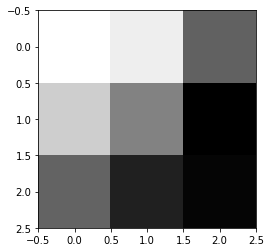

In [21]:
plt.imshow(a[...,0][...,0], cmap='gray')

## Extract features with VGG16


In [69]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

In [70]:
img_path = 'bono.jpg'
# load_img = pil.open 
# target_size: 224.224 
# pil: 자체포맷
# keras는 넘파이가 기본 포맷 (np.array())
img = image.load_img(img_path, target_size=(224, 224))

In [71]:
np.array(img).shape

(224, 224, 3)

In [72]:
from keras.preprocessing import image
image.img_to_array(img).shape

(224, 224, 3)

In [73]:
np.all([np.array(img), image.img_to_array(img)])
# 차이점? 

False

In [96]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# preprocess_input: 한거와 안한거와 조금 다르다.
# normalization (모델 전처리 방법 같이 적용)
x = preprocess_input(x)

features = model.predict(x)

# feed-forward: output 값- feature특정 특성이 있다면 가중치를 더해준다. 

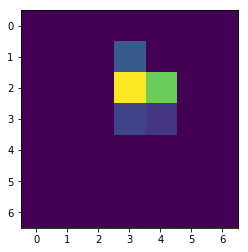

In [75]:
plt.imshow(features[0,...,30])

## Extract features from an arbitrary intermediate layer with VGG19

새로운 모델을 만들어버린다. 

layer 한개 짜리인데, weights와 이미지를 곱한 것 

input= 원래 모델 input

output= 내가 보여주고 싶은 모델 (특정 output) 

In [ ]:
# from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')

In [87]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [92]:
# input data를 outputs layer애로 곱해준다는 것이다.
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

In [93]:
img_path = 'bono.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)

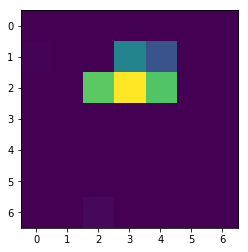

In [94]:
plt.imshow(block4_pool_features[0,...,30])

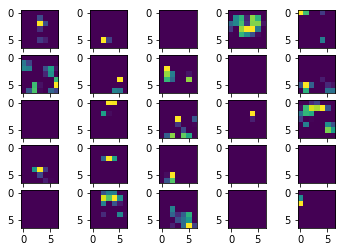

In [95]:
# 특징을 곱한 것이다. 
fig, axes = plt.subplots(5,5)
for i, axs in enumerate(axes.ravel()):
    axs.imshow(block4_pool_features[0,...,i])

In [97]:
from PIL.Image import open

In [99]:
bono = open('bono.jpg')

In [103]:
x = np.array(bono)

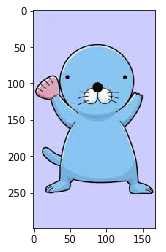

In [104]:
plt.imshow(x)

In [102]:
from keras.preprocessing import image
y = image.img_to_array(bono)

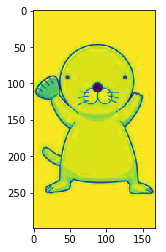

In [111]:
plt.imshow(y[...,-1])

### 꽃 데이터 불러오기 

temp = vgg.layers[:-3].copy()
temp.append(Dense(64, activation='relu'))
temp.append(Dense(5, activation='softmax'))

from tensorflow.keras.models import Sequential

model = Sequential(temp)
model.fit_generator()

In [1]:
import tensorflow as tf

AUTOTUNE = tf.data.experimental.AUTOTUNE

In [2]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [5]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype='<U10')

In [6]:
roses = list(data_dir.glob('roses/*'))

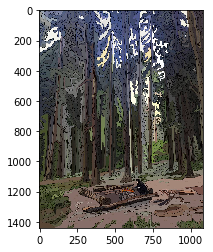

In [7]:
for i in os.listdir():
    if i.split('.')[-1] in ['jpg','png']:
        t = Image.open(i)
        x = np.array(t)
        plt.imshow(x)

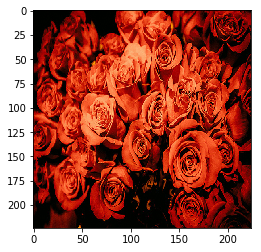

In [8]:
for image_path in roses[:3]:
    image= Image.open(str(image_path))
    image=image.resize((224,224))
    plt.imshow(image)

In [9]:
# - Image_generator

# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

- flow
- flow from directory
- flow from dataframe

In [10]:
# BATCH_SIZE = 32
# IMG_HEIGHT = 224
# IMG_WIDTH = 224
# STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

train_data_gen = image_generator.flow_from_directory(str(data_dir),
                                                    target_size=(224,224))
# train_size: 256 

Found 3670 images belonging to 5 classes.


In [11]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential

In [12]:
for image_batch, label_batch in train_data_gen:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


In [13]:
'__next__' in dir(train_data_gen)

True

In [14]:
from tensorflow.keras.applications.vgg16 import VGG16

In [15]:
import tensorflow

In [18]:
input1 = tensorflow.keras.layers.Input(shape=(224,224,3))

In [16]:
vgg16 = VGG16(include_top = False)

In [20]:
x = vgg16(input1)

In [21]:
x = Flatten()(x)

In [22]:
x = Dense(5, activation='softmax')(x)

In [23]:
model = tensorflow.keras.Model(inputs=input1, outputs=x)

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 5)                 125445    
Total params: 14,840,133
Trainable params: 14,840,133
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss='categorical_crossentropy',
             metrics=['acc'])
# one hot encoding X : sparse_categorical

In [ ]:
model.fit_generator(train_data_gen)

In [ ]:
# transfer learning 
# 일반적으로 학습 시간 줄어든다.
# 성능도 높여준다.

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential

vgg.add(Dense(64, activation='relu'))

vgg.add(Dense(5, activation='softmax'))

vgg는 add가 없다. 
model.add가 없을 때 functional api를 쓰면된다. 

모델 input, output를 도입해서 할 수 있다. 

list를 형성

In [40]:
input2 = (224,224,3)

In [28]:
import inspect

In [44]:
print(inspect.getsource(VGG16))
# VGG 안에 데코레이터로 불러와서 그냥 keras보는게 낫다. 

  def wrapper(*args, **kwargs):
    kwargs['backend'] = backend
    if 'layers' not in kwargs:
      kwargs['layers'] = layers
    kwargs['models'] = models
    kwargs['utils'] = utils
    return base_fun(*args, **kwargs)



In [41]:
vgg = VGG16(include_top=False,input_shape=input2)

In [42]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [1]:
vgg = VGG16(include_top=True)

NameError: name 'VGG16' is not defined

In [82]:
temp = []
for layer in vgg.layers[:4]:
    layer.trainbale = False # weights 업데이트 하느냐 안하느냐
#     featue extration: 안하는것
# fine tuning 할 대는 weights 업데이트 (자기가 골라서)
    temp.append(layer)

AttributeError: 'Tensor' object has no attribute 'layers'

In [78]:
temp[:5]

In [80]:
temp.append(Flatten(input_shape=(None, 802816) ))

temp.append(Dense(64, activation='relu'))

temp.append(Dense(5, activation ='softmax'))

model = Sequential(temp)

In [81]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        multiple                  1792      
_________________________________________________________________
block1_conv2 (Conv2D)        multiple                  36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
dense_5 (Dense)              (None, None, None, 64)    4160      
_________________________________________________________________
dense_6 (Dense)              (None, None, None, 5)     325       
Total params: 43,205
Trainable params: 43,205
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss='categorical_crossentropy',
             metrics=['acc'])
# one hot encoding X : sparse_categorical

In [ ]:
model.fit_generator(train_data_gen)

In [1]:
2 + 4 + 4

10